# Data Science for Business I - Telco Churn Prediction Project
Link to dataset: https://www.kaggle.com/datasets/barun2104/telecom-churn

## Libaries importing and data checking


In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pydotplus
from IPython.display import Image
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn import tree


In [ ]:
from google.colab import files
upload=files.upload()

Saving telecom_churn.csv to telecom_churn.csv


In [ ]:
data = pd.read_csv('telecom_churn.csv')
data.head()

Churn  AccountWeeks  ContractRenewal  DataPlan  DataUsage  CustServCalls  \
0      0           128                1         1        2.7              1   
1      0           107                1         1        3.7              1   
2      0           137                1         0        0.0              0   
3      0            84                0         0        0.0              2   
4      0            75                0         0        0.0              3   

   DayMins  DayCalls  MonthlyCharge  OverageFee  RoamMins  
0    265.1       110           89.0        9.87      10.0  
1    161.6       123           82.0        9.78      13.7  
2    243.4       114           52.0        6.06      12.2  
3    299.4        71           57.0        3.10       6.6  
4    166.7       113           41.0        7.42      10.1

In [ ]:
data.shape

(3333, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [ ]:
data.nunique()

Churn                 2
AccountWeeks        212
ContractRenewal       2
DataPlan              2
DataUsage           174
CustServCalls        10
DayMins            1667
DayCalls            119
MonthlyCharge       627
OverageFee         1024
RoamMins            162
dtype: int64

'Churn', 'ContractRenewal' and 'DataPlan' are binary variables, while the remaining attributes are continous.

In [ ]:
data.describe().style

## Descriptive analysis and exploratory data analysis

In [ ]:
class_counts = data['Churn'].value_counts()
class_counts

0    2850
1     483
Name: Churn, dtype: int64

In [ ]:
data["Churn"].value_counts() / data.shape[0]

0    0.855086
1    0.144914
Name: Churn, dtype: float64

The results of two code lines from above show imbalanced class distribution with ~86% of the dataset belong to the No-churn class.


([<matplotlib.patches.Wedge at 0x7eec9d472950>,
 [Text(-0.9879602731612546, 0.4836677564766329, 'No Churn'),
  Text(0.9879602505191316, -0.4836678027263907, 'Churn')],
 [Text(-0.5388874217243206, 0.26381877625998157, '85.5%'),
  Text(0.5388874093740718, -0.26381880148712217, '14.5%')])

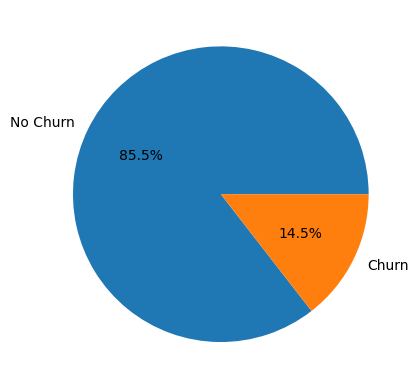

In [ ]:
plt.pie(class_counts, labels = ['No Churn', 'Churn'], autopct = '%1.1f%%')

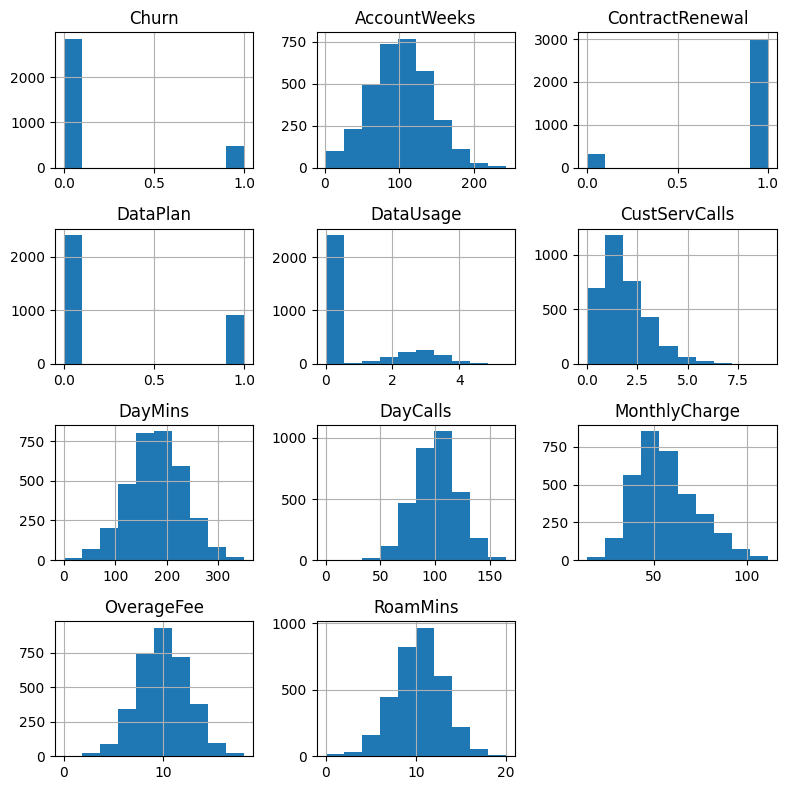

In [ ]:
#plot the data distribution of each variable
data.hist(figsize=(8,8))
plt.tight_layout()

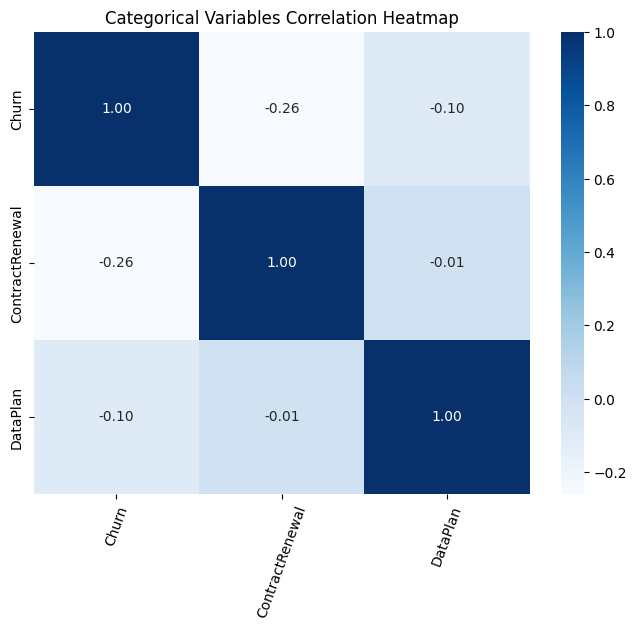

In [ ]:
variables1 = ['Churn', 'ContractRenewal', 'DataPlan']
plt.figure(figsize=(8, 6))
sns.heatmap(data[variables1].corr(), annot=True, fmt=".2f", cmap = 'Blues')
plt.xticks(rotation=70)
plt.title("Categorical Variables Correlation Heatmap")
plt.show()

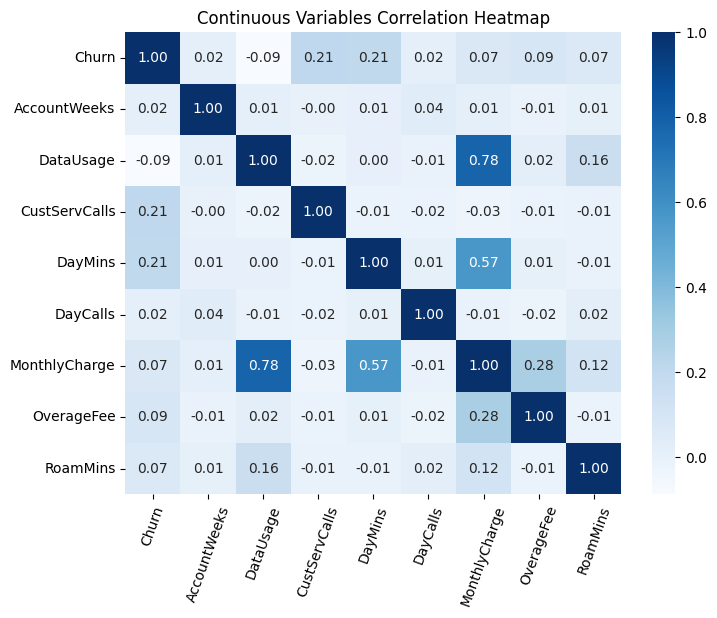

In [ ]:
variables2 = ['Churn', 'AccountWeeks', 'DataUsage', 'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee', 'RoamMins']
plt.figure(figsize = (8,6))
sns.heatmap(data[variables2].corr(), annot=True, fmt = '.2f', cmap = 'Blues')
plt.xticks(rotation=70)
plt.title("Continuous Variables Correlation Heatmap")
plt.show()

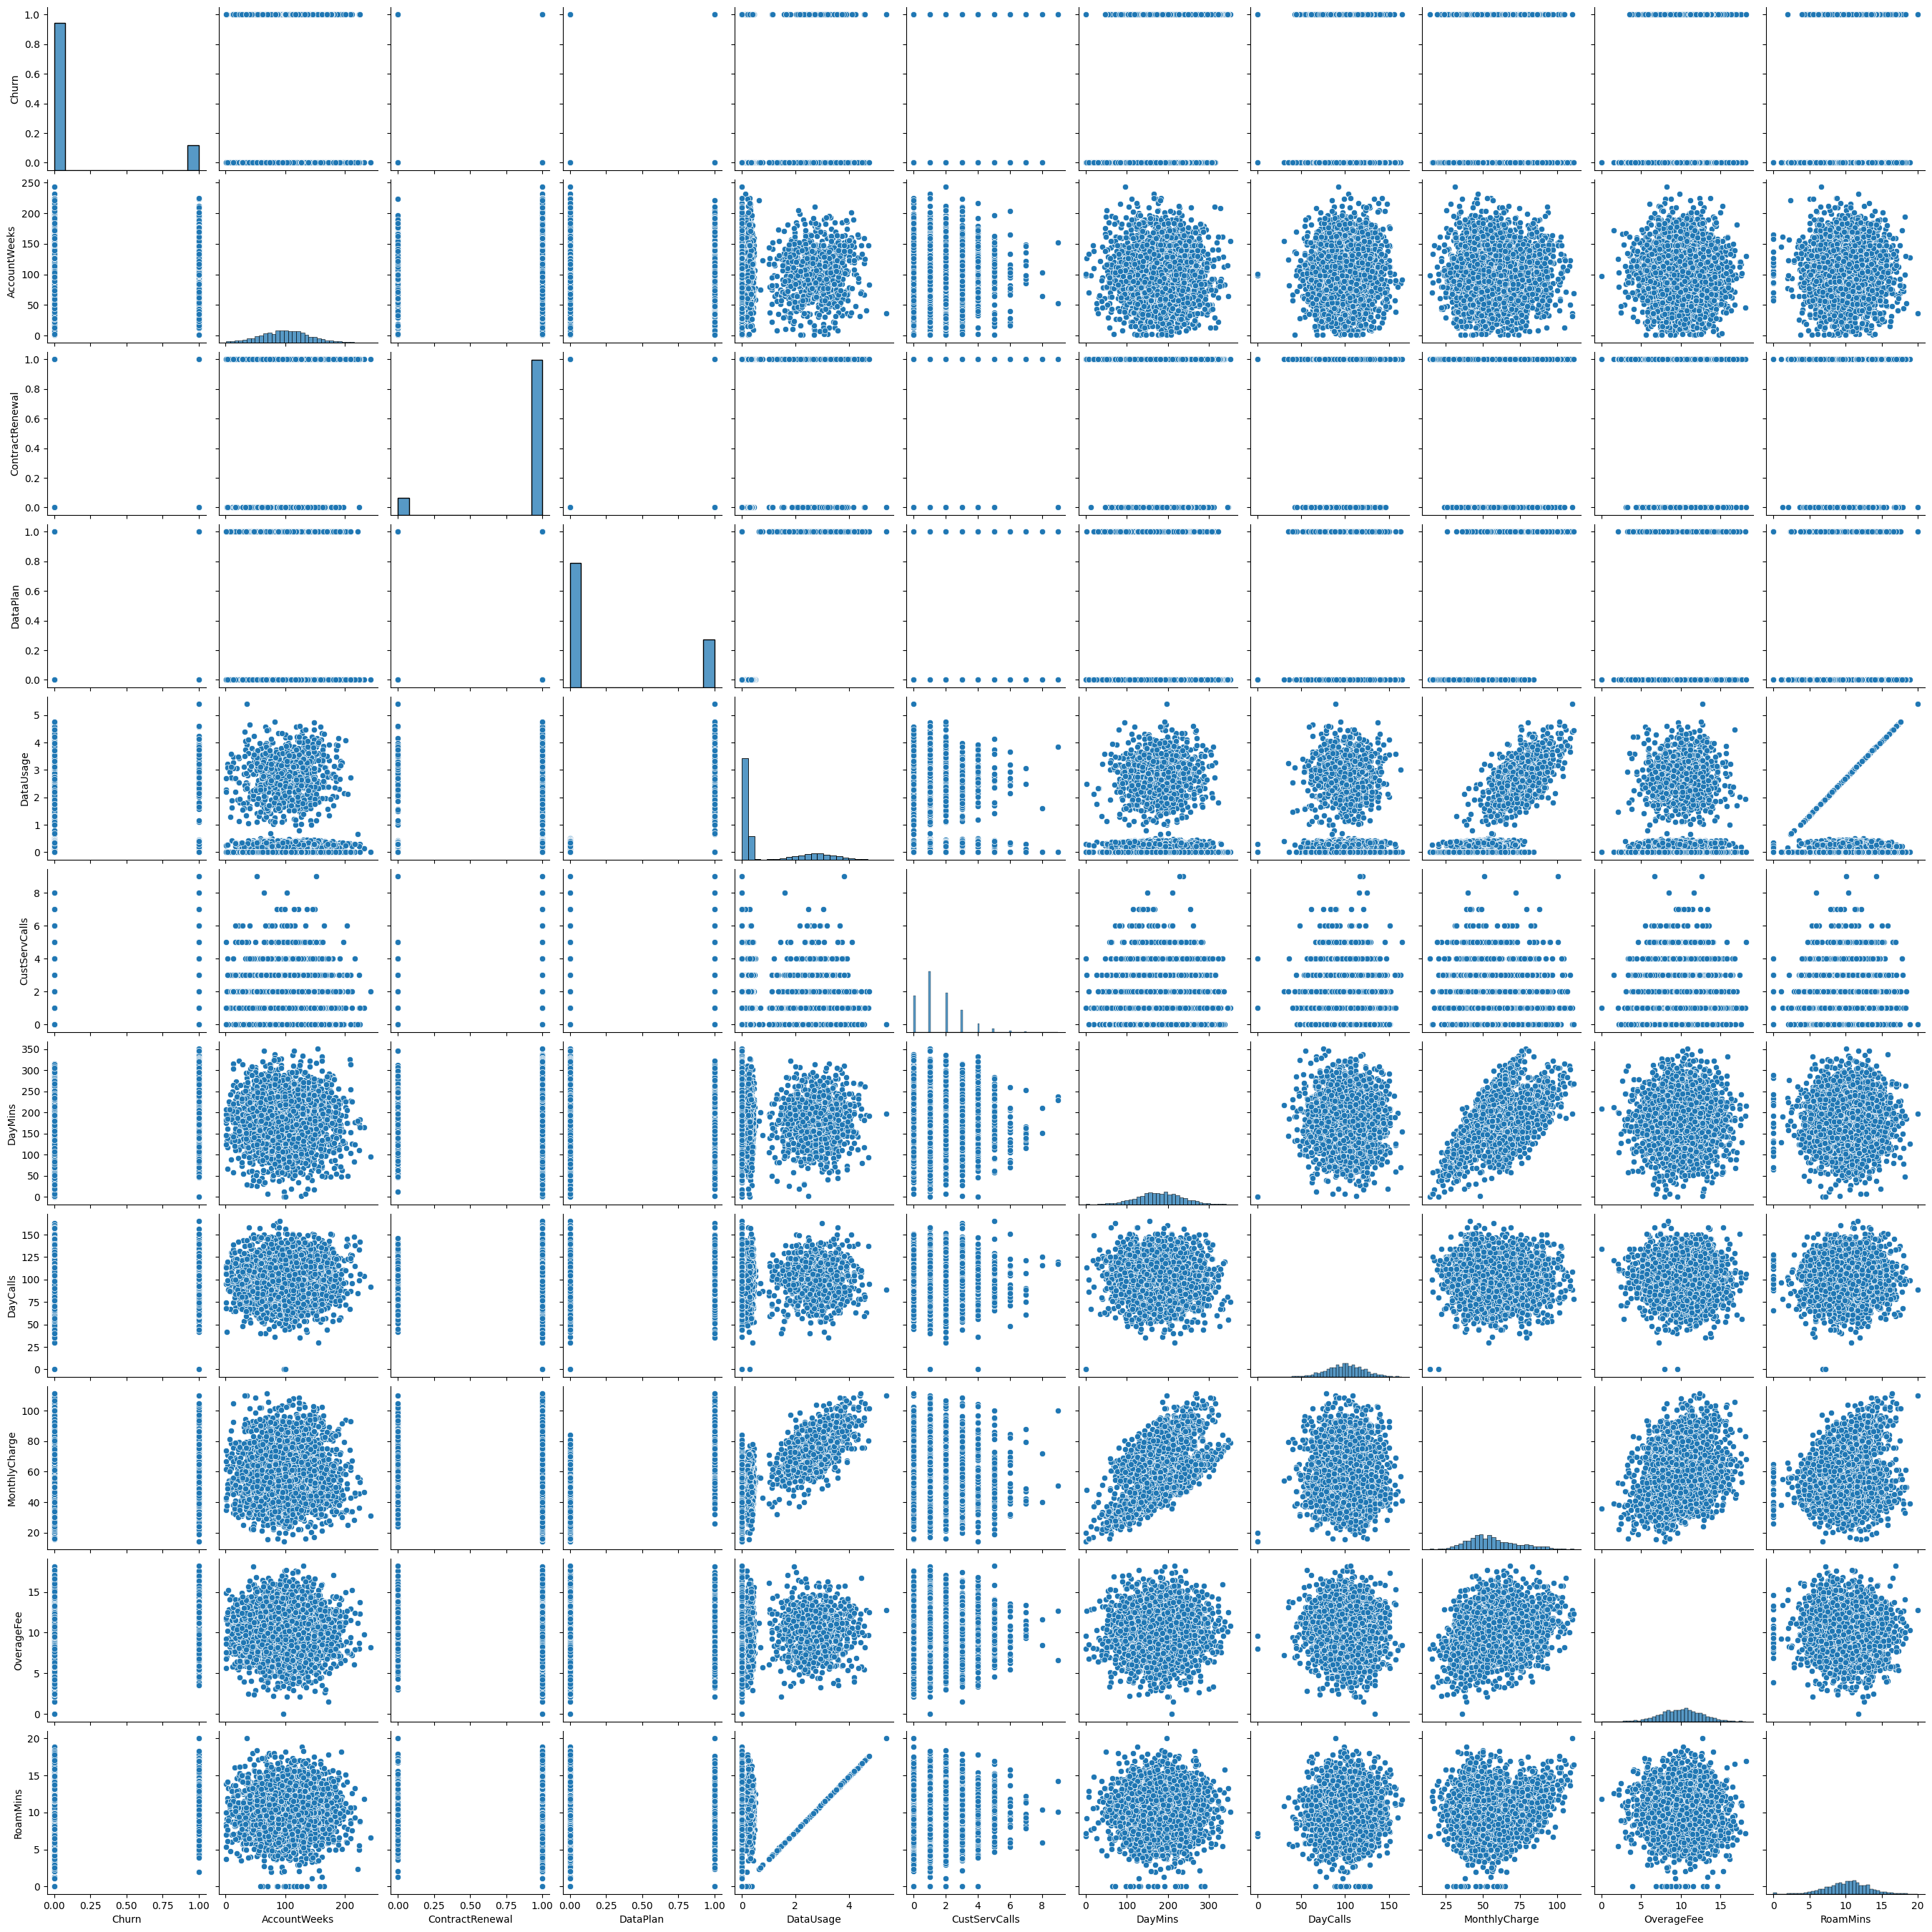

In [ ]:
#plot pairwise distributions of the dataset
sns.pairplot(data)

Text(0.5, 1.0, 'Churn by Contract Renewal')

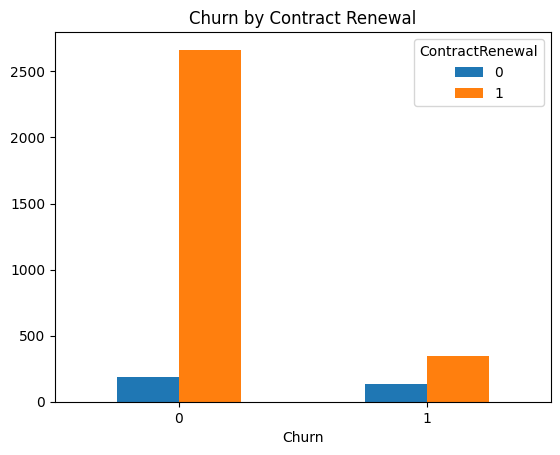

In [ ]:
#churn by contract renewal
data.groupby(['Churn', 'ContractRenewal'])['ContractRenewal'].count().unstack().plot.bar(rot=0)
plt.title('Churn by Contract Renewal')

Text(0.5, 1.0, 'Churn by Data Plan')

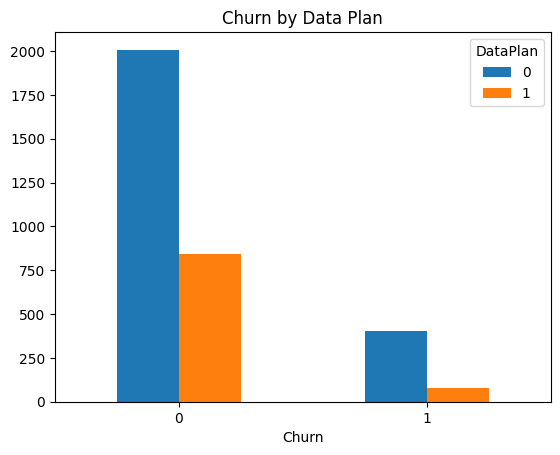

In [ ]:
#churn by data plan
data.groupby(['Churn', 'DataPlan'])['DataPlan'].count().unstack().plot.bar(rot=0)
plt.title('Churn by Data Plan')

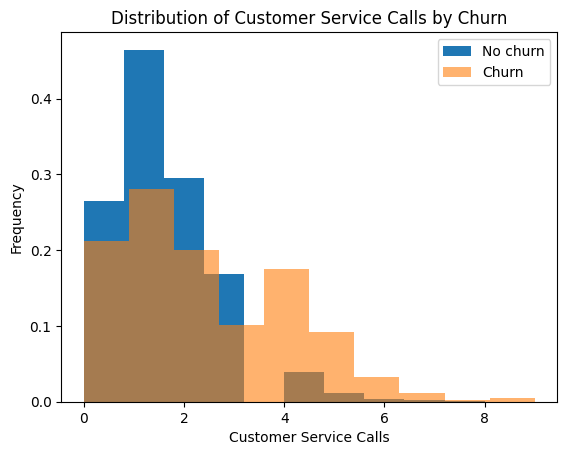

In [ ]:
#churn by customer service calls
ax = data['CustServCalls'].loc[data['Churn'] == 0].plot.hist(density = True, label='No churn')
ax = data['CustServCalls'].loc[data['Churn'] == 1].plot.hist(density = True, alpha=0.6, label='Churn')
ax.set_xlabel('Customer Service Calls')
ax.set_title('Distribution of Customer Service Calls by Churn')
ax.legend();

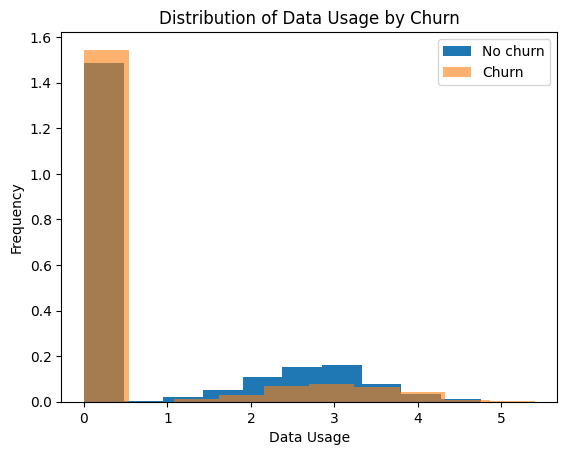

In [ ]:
#churn by data usage
ax = data['DataUsage'].loc[data['Churn'] == 0].plot.hist(density = True, label='No churn')
ax = data['DataUsage'].loc[data['Churn'] == 1].plot.hist(density = True, alpha=0.6, label='Churn')
ax.set_xlabel('Data Usage')
ax.set_title('Distribution of Data Usage by Churn')
ax.legend();

Text(0, 0.5, 'Monthly Charge')

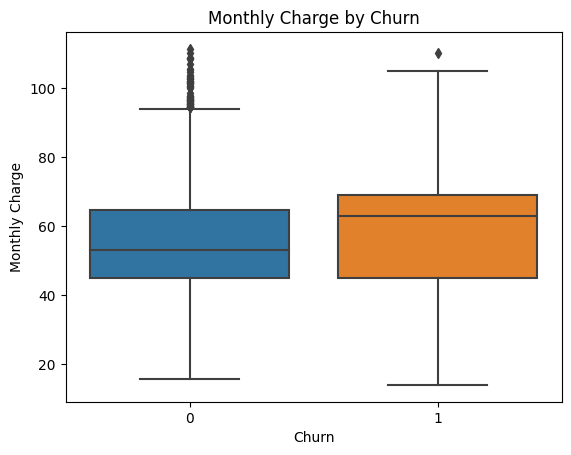

In [ ]:
#churn by monthly charge
sns.boxplot(x='Churn', y='MonthlyCharge', data=data)
plt.title('Monthly Charge by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charge')

Text(0, 0.5, 'Overage Fees')

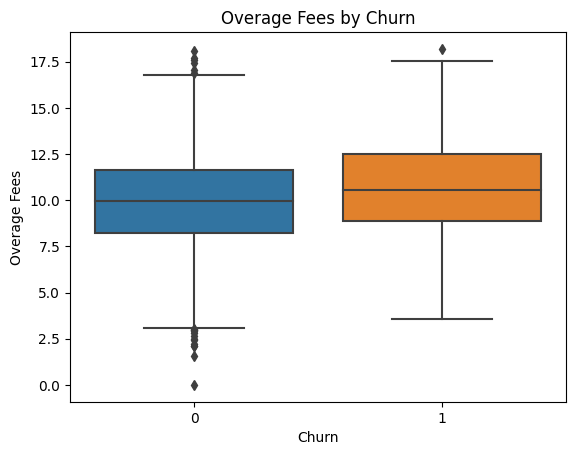

In [ ]:
#churn by overage fees
sns.boxplot(x='Churn', y='OverageFee', data=data)
plt.title('Overage Fees by Churn')
plt.xlabel('Churn')
plt.ylabel('Overage Fees')

## Exploratory data analysis conclusions:
- More than half of explanatory variables have normal data distribution that is symmetrical round the mean. Churn and some variables like Data Plan, Customer service calls, Data usage have stronger left tails, indicating more values in the lower range.
- Customer service calls and Day mins have the strongest correlation with churn, both having correlation coefficient of 0.21.
- Contract Renewal has the strongest inverse correlation with Churn with the coefficient of -0.26.
- Customers that renew their contract with the company are less likely to churn.
- Customers that have less data usage tend to churn more
- Customers that churn have more customer service calls, higher monthly charge and overage fees compared to those that don't churn.

## Train, test split

In [ ]:
#separate data variables into input X and output y sets
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
#split the train, test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
column_names = X_train.columns


In [ ]:
#double-check the splitted train, test data sets
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(3333,)
(2333,)
(1000,)


In [ ]:
#standardize feature values using StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#balance training data using SMOTE
sm = SMOTE(random_state = 1234)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)
X_train_sm = pd.DataFrame(X_train_sm, columns=column_names)
column_names_sm = X_train_sm.columns


In [ ]:
#balance training data using ADASYN
ada = ADASYN(random_state = 1234)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
X_train_ada = pd.DataFrame(X_train_ada, columns=column_names)
column_names_ada = X_train_ada.columns



## Support vector machine (SVM) model

In [ ]:
#intiatlize SVM model
svm_model = SVC(probability = True)

In [ ]:
#fit the SVM model to training data
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred_svm = svm_model.predict(X_test)
accuracy_score(y_test, y_pred_svm)

0.912

In [ ]:
recall_score(y_test,y_pred_svm)

0.48951048951048953

In [ ]:
#build SVM model using SMOTE
svm_model_sm = SVC(probability = True)
svm_model_sm.fit(X_train_sm, y_train_sm)
y_pred_svm_sm = svm_model_sm.predict(X_test)
accuracy_score(y_test,y_pred_svm_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.887

In [ ]:
recall_score(y_test, y_pred_svm_sm)

0.7622377622377622

In [ ]:
#build SVM model using ADASYN
svm_model_ada = SVC(probability = True)
svm_model_ada.fit(X_train_ada, y_train_ada)
y_pred_svm_ada = svm_model_ada.predict(X_test)
accuracy_score(y_test, y_pred_svm_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.875

In [ ]:
recall_score(y_test, y_pred_svm_ada)

0.7972027972027972

## Decision tree model


In [ ]:
#initialize a decision tree and fit the model to the training data
tree_model = DecisionTreeClassifier(random_state=1234, max_depth=5, min_samples_leaf=4)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, random_state=1234)

In [ ]:
y_pred_tree = tree_model.predict(X_test)
accuracy_score(y_test, y_pred_tree)

0.921

In [ ]:
recall_score(y_test, y_pred_tree)

0.5384615384615384

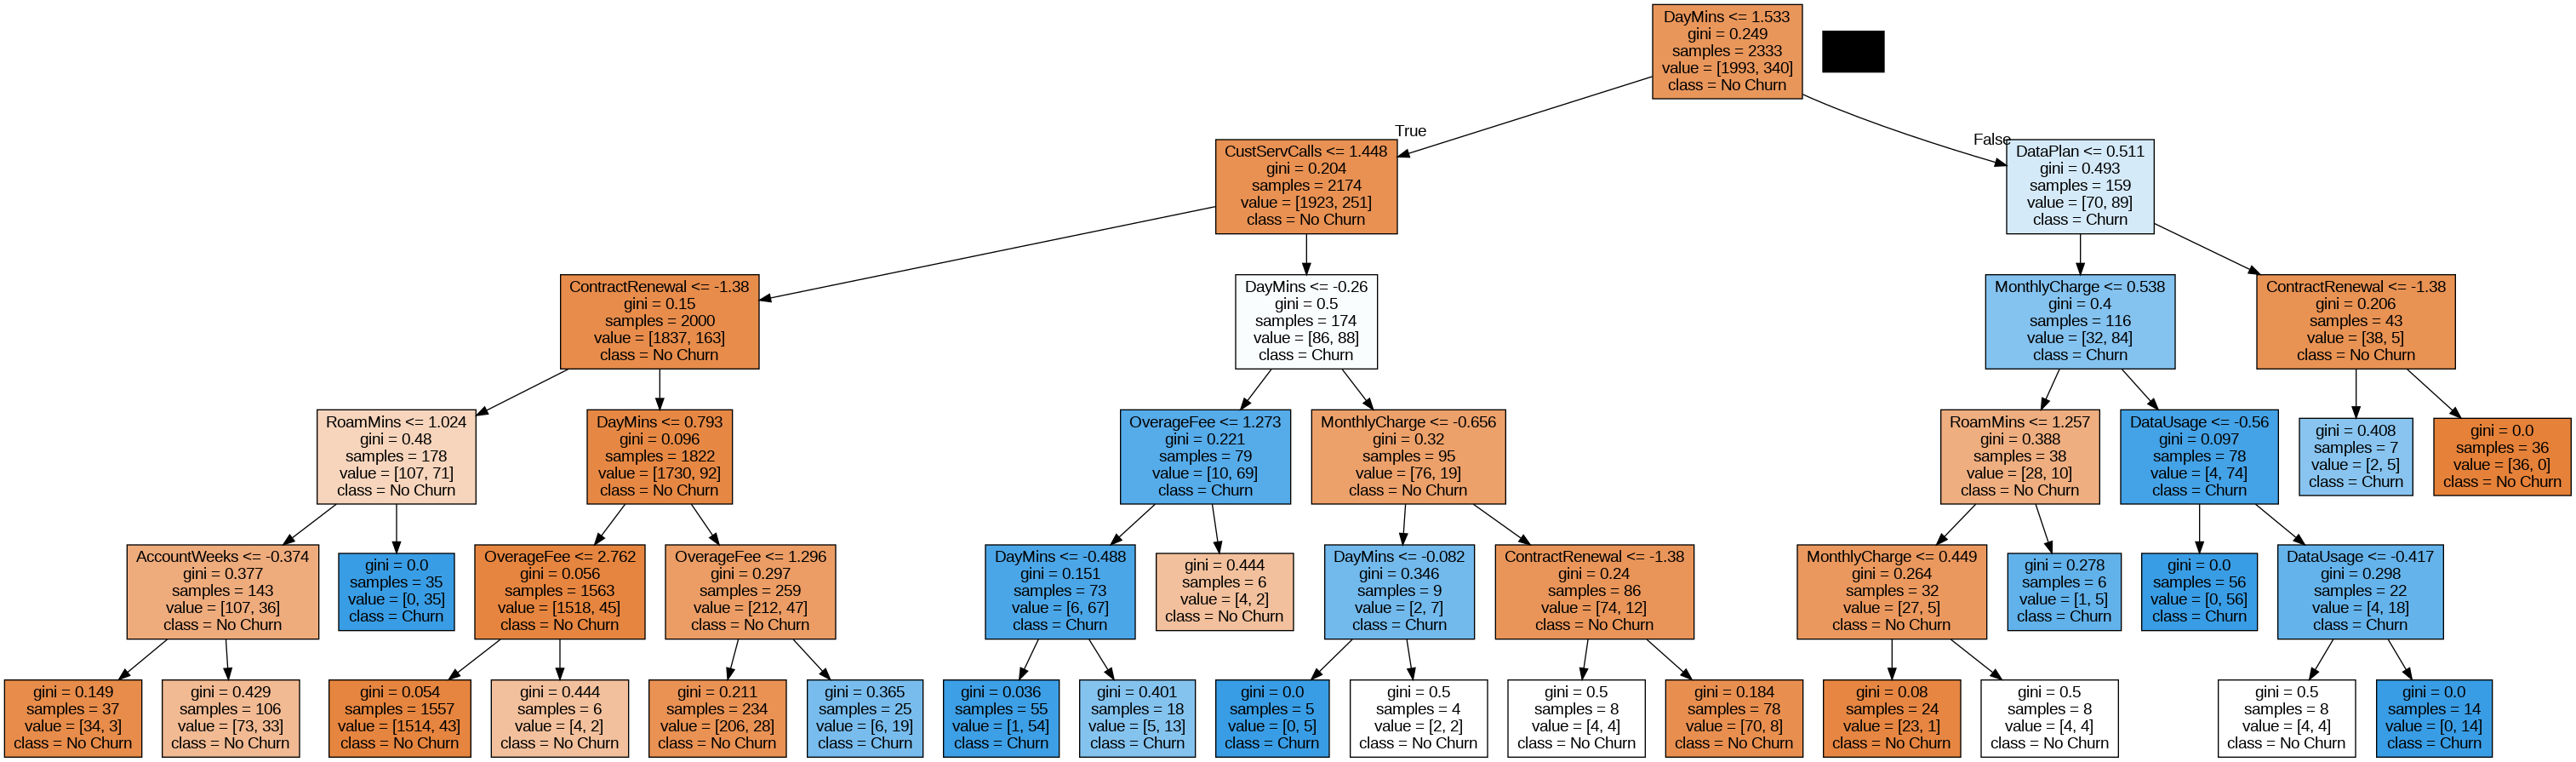

In [ ]:
#visualize decision tree for original imbalanced data
dot_data = tree.export_graphviz(tree_model, out_file=None, feature_names=column_names, class_names=["No Churn", "Churn"], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#build decision tree using SMOTE
tree_sm = DecisionTreeClassifier(random_state = 1234, max_depth=5, min_samples_leaf=4)
tree_sm.fit(X_train_sm, y_train_sm)
y_pred_tree_sm = tree_sm.predict(X_test)
accuracy_score(y_test, y_pred_tree_sm)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.865

In [ ]:
recall_score(y_test, y_pred_tree_sm)

0.7692307692307693

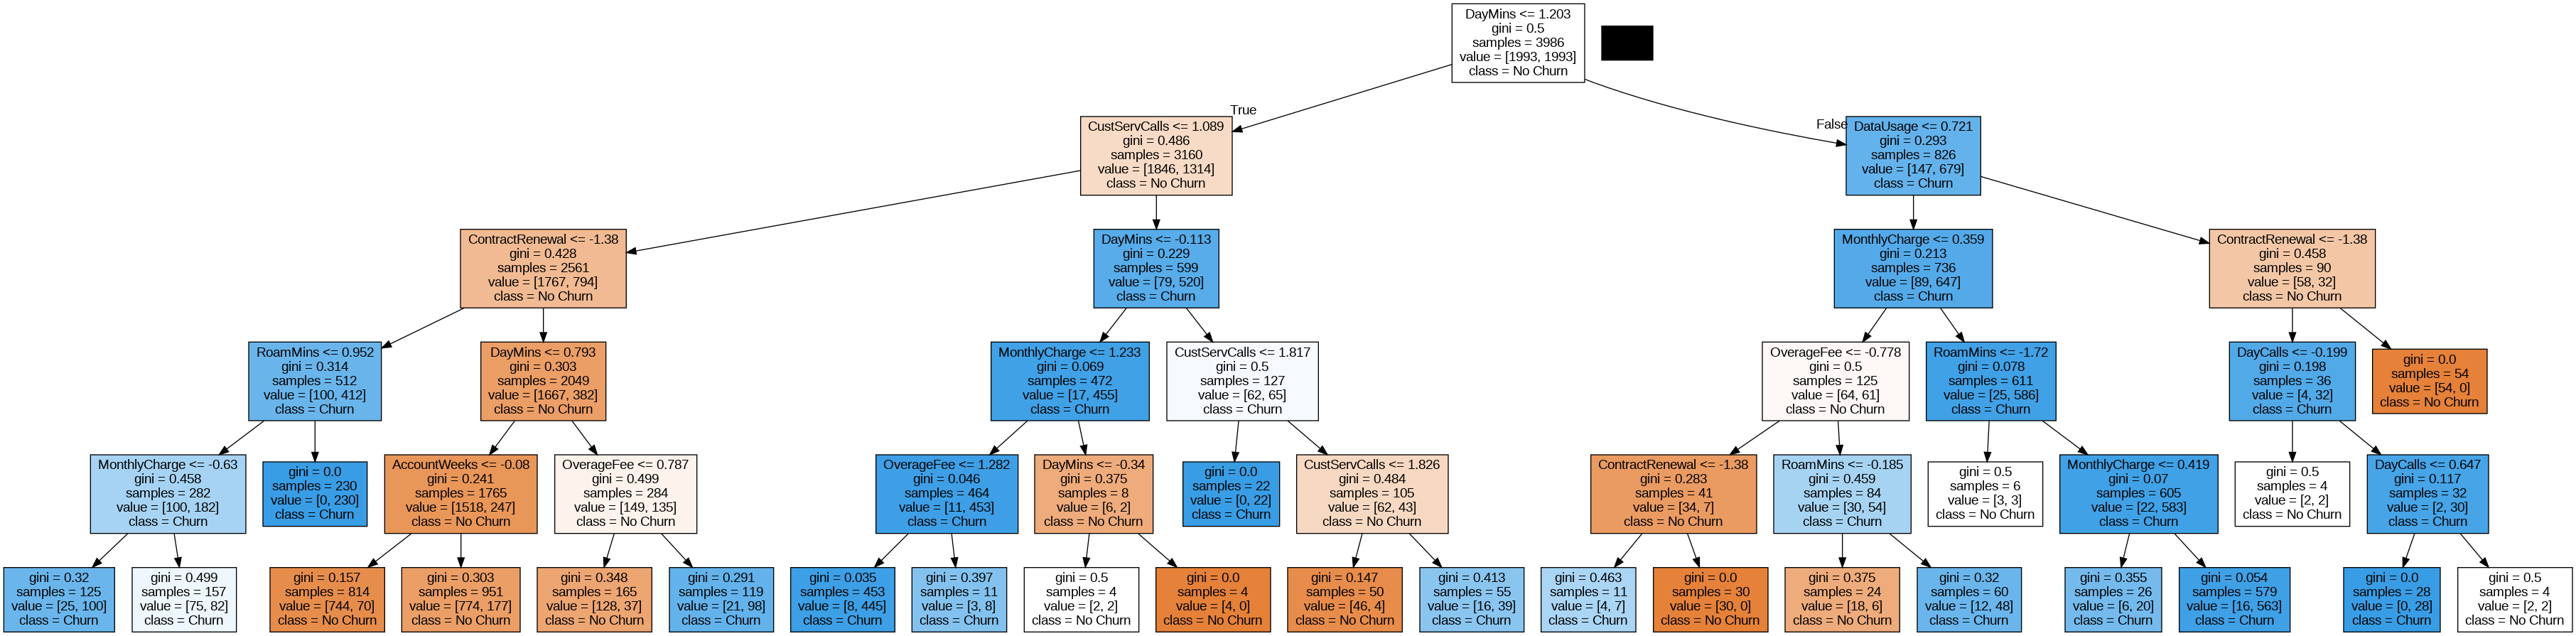

In [ ]:
#visualize decision tree for balanced data with SMOTE
dot_data = tree.export_graphviz(tree_sm, out_file=None, feature_names=column_names_sm, class_names=["No Churn", "Churn"], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#build decision tree using ADASYN
tree_ada = DecisionTreeClassifier(random_state = 1234, max_depth=5, min_samples_leaf=4)
tree_ada.fit(X_train_ada, y_train_ada)
y_pred_tree_ada = tree_ada.predict(X_test)
accuracy_score(y_test, y_pred_tree_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.89

In [ ]:
recall_score(y_test, y_pred_tree_ada)

0.6993006993006993

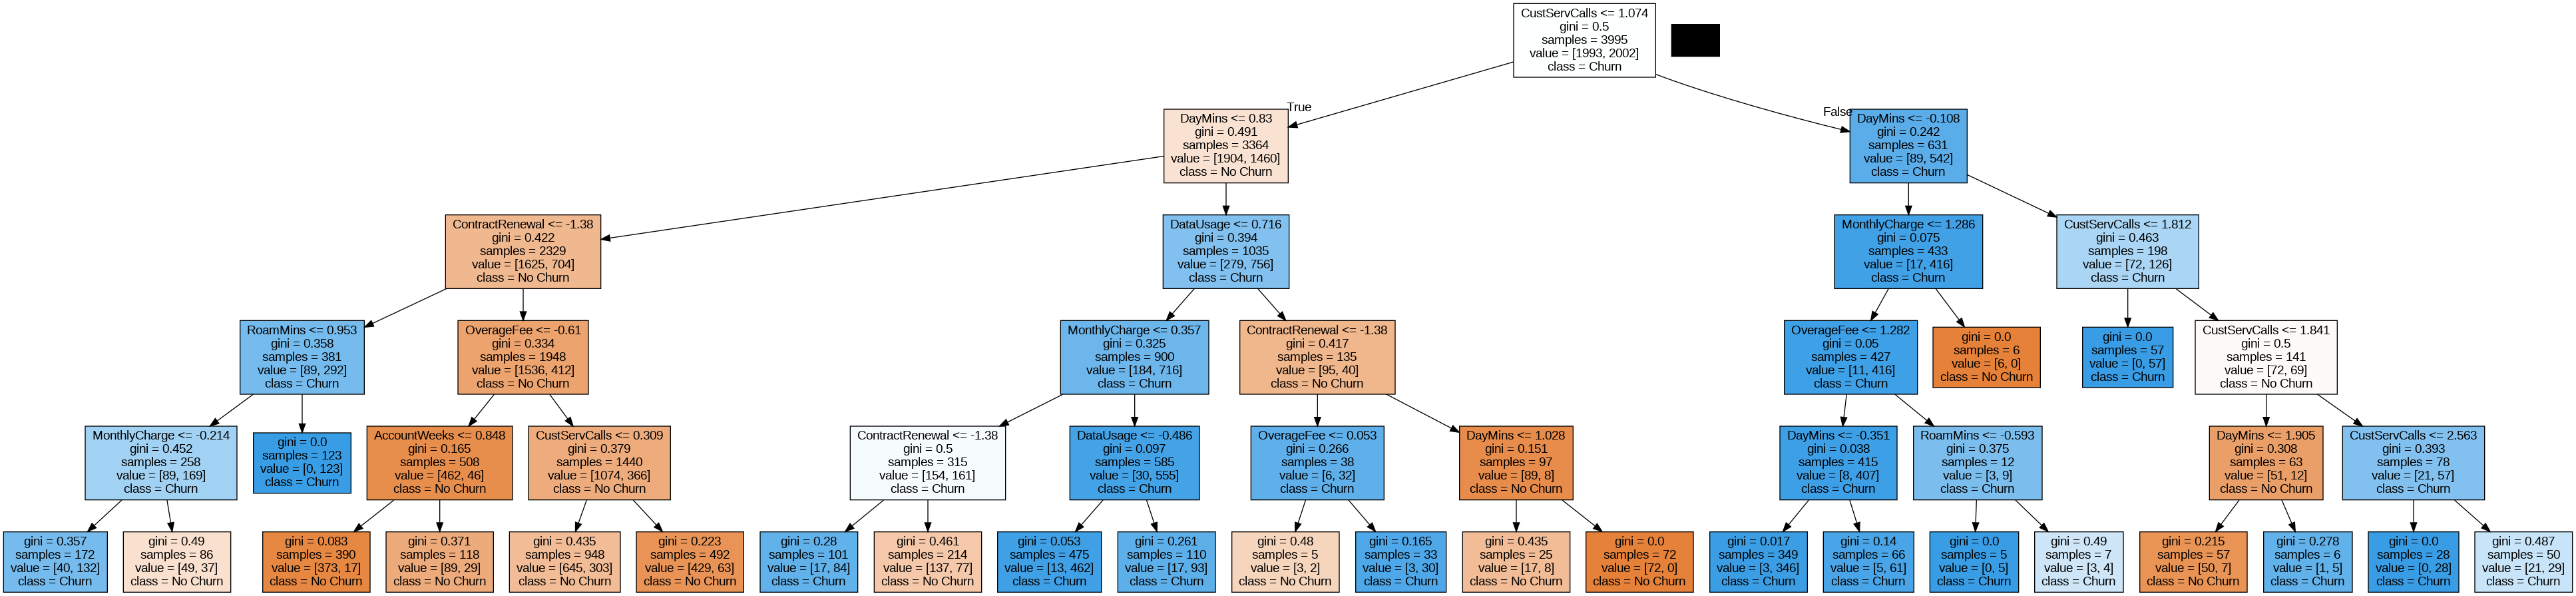

In [ ]:
#visualize decision tree for balanced data using ADASYN
dot_data = tree.export_graphviz(tree_ada, out_file=None, feature_names=column_names_ada, class_names=["No Churn", "Churn"], filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Logistic regression model


In [ ]:
#build a logistic regresssion model and fit to the training data
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred_logreg = logreg_model.predict(X_test)
accuracy_score(y_test,y_pred_logreg)


0.867

In [ ]:
recall_score(y_test, y_pred_logreg)

0.20279720279720279

In [ ]:
#build logistic regression model using SMOTE
logreg_sm = LogisticRegression(random_state = 42)
logreg_sm.fit(X_train_sm, y_train_sm)
y_pred_logreg_sm = logreg_sm.predict(X_test)
accuracy_score(y_test, y_pred_logreg_sm)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.777

In [ ]:
recall_score(y_test, y_pred_logreg_sm)

0.8181818181818182

In [ ]:
#build logistic regression model using ADASYN
logreg_ada = LogisticRegression(random_state = 42)
logreg_ada.fit(X_train_ada, y_train_ada)
y_pred_logreg_ada = logreg_ada.predict(X_test)
accuracy_score(y_test, y_pred_logreg_ada)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.757

In [ ]:
recall_score(y_test, y_pred_logreg_ada)

0.8181818181818182

## Model evaluation


Churn is the positive class and we will evaluate models mainly based on their corresponding True Positive Rate which informs the model's performance to predict accurately customers who churn.

Plot confusion matrices for all models that have been built:

<ipython-input-54-8a880f69d06c>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, i + 1)


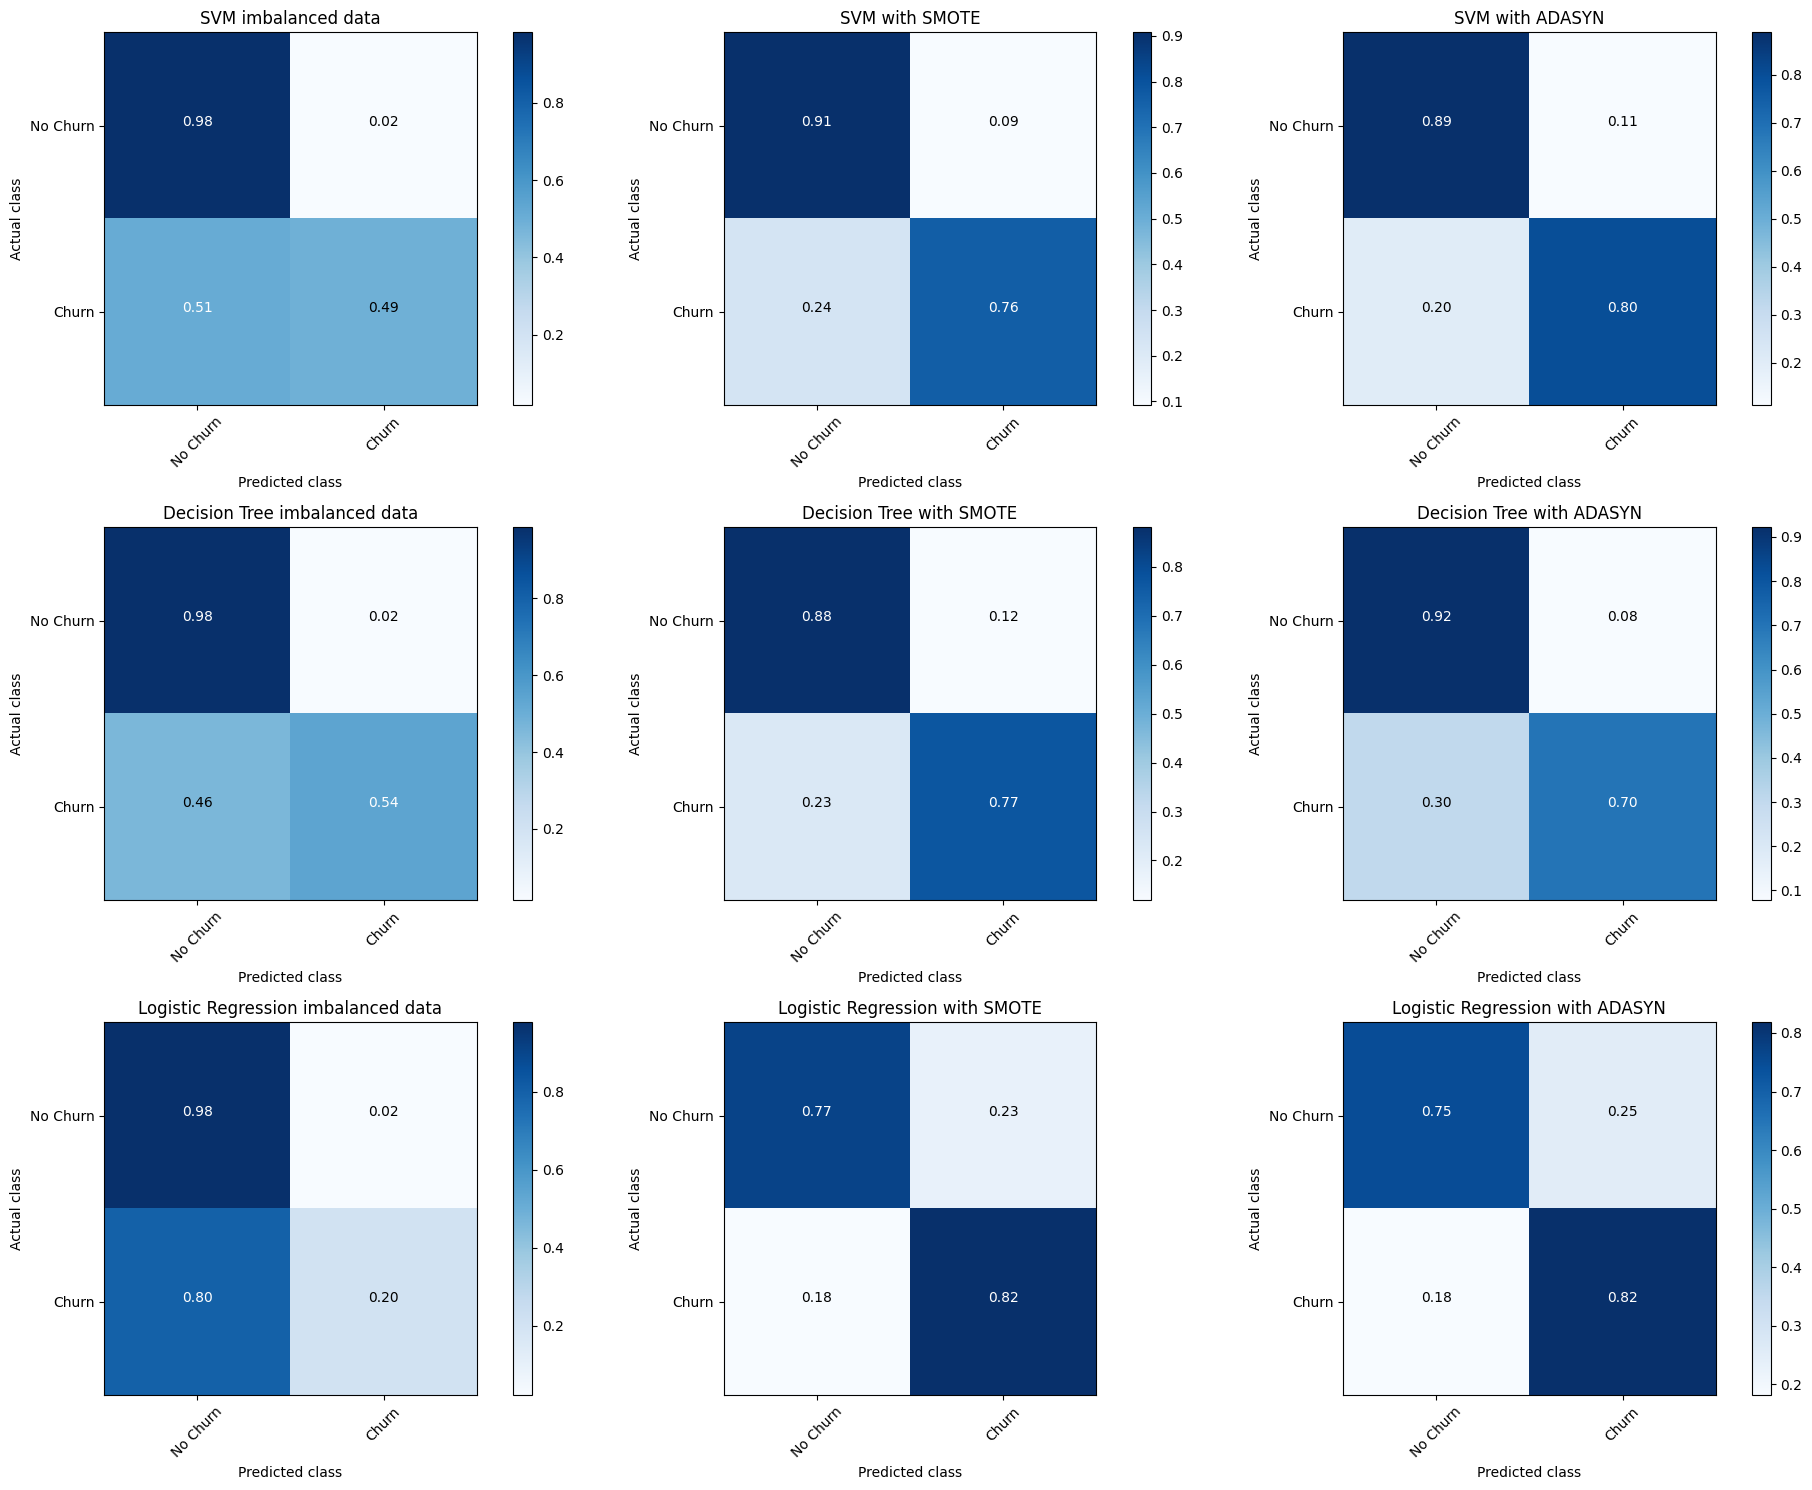

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

#target classes to predict
class_names = ['No Churn', 'Churn']

#define the confusion matrix data for each model
model_names = ['SVM imbalanced data', 'SVM with SMOTE', 'SVM with ADASYN',
               'Decision Tree imbalanced data', 'Decision Tree with SMOTE', 'Decision Tree with ADASYN',
               'Logistic Regression imbalanced data', 'Logistic Regression with SMOTE', 'Logistic Regression with ADASYN']

#prepare the confusion matrices
cnf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
cnf_matrix_svm_ada = confusion_matrix(y_test, y_pred_svm_ada)
cnf_matrix_svm_sm = confusion_matrix(y_test, y_pred_svm_sm)
cnf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
cnf_matrix_tree_sm = confusion_matrix(y_test, y_pred_tree_sm)
cnf_matrix_tree_ada = confusion_matrix(y_test, y_pred_tree_ada)
cnf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
cnf_matrix_logreg_sm = confusion_matrix(y_test, y_pred_logreg_sm)
cnf_matrix_logreg_ada = confusion_matrix(y_test, y_pred_logreg_ada)

confusion_matrices = [cnf_matrix_svm, cnf_matrix_svm_sm, cnf_matrix_svm_ada,
                      cnf_matrix_tree, cnf_matrix_tree_sm, cnf_matrix_tree_ada,
                      cnf_matrix_logreg, cnf_matrix_logreg_sm, cnf_matrix_logreg_ada]

#create matrix subplots for each model
plt.figure(figsize=(20, 15))
for i, (matrix, title) in enumerate(zip(confusion_matrices, model_names)):
    plt.subplot(3, 3, i + 1)
    plot_confusion_matrix(matrix, classes=class_names, normalize=True, title=title)

plt.show()

Compare the models using different accuracy scores, focusing specificially on Recall as it informs a model's ability to correctly predict True Positives.

In [ ]:
metrics_svm = {
    'F1': f1_score(y_test, y_pred_svm),
    'Recall': recall_score(y_test, y_pred_svm),
    'Accuracy': accuracy_score(y_test, y_pred_svm),
    'Precision': precision_score(y_test, y_pred_svm)
}
metrics_svm_sm = {
    'F1': f1_score(y_test, y_pred_svm_sm),
    'Recall': recall_score(y_test, y_pred_svm_sm),
    'Accuracy': accuracy_score(y_test, y_pred_svm_sm),
    'Precision': precision_score(y_test, y_pred_svm_sm)
}
metrics_svm_ada = {
    'F1': f1_score(y_test, y_pred_svm_ada),
    'Recall': recall_score(y_test, y_pred_svm_ada),
    'Accuracy': accuracy_score(y_test, y_pred_svm_ada),
    'Precision': precision_score(y_test, y_pred_svm_ada)
}

metrics_tree = {
    'F1': f1_score(y_test, y_pred_tree),
    'Recall': recall_score(y_test, y_pred_tree),
    'Accuracy': accuracy_score(y_test, y_pred_tree),
    'Precision': precision_score(y_test, y_pred_tree)
}
metrics_tree_sm = {
    'F1': f1_score(y_test, y_pred_tree_sm),
    'Recall': recall_score(y_test, y_pred_tree_sm),
    'Accuracy': accuracy_score(y_test, y_pred_tree_sm),
    'Precision': precision_score(y_test, y_pred_tree_sm)
}
metrics_tree_ada = {
    'F1': f1_score(y_test, y_pred_tree_ada),
    'Recall': recall_score(y_test, y_pred_tree_ada),
    'Accuracy': accuracy_score(y_test, y_pred_tree_ada),
    'Precision': precision_score(y_test, y_pred_tree_ada)
}
metrics_log = {
    'F1': f1_score(y_test, y_pred_logreg),
    'Recall': recall_score(y_test, y_pred_logreg),
    'Accuracy': accuracy_score(y_test, y_pred_logreg),
    'Precision': precision_score(y_test, y_pred_logreg)
}
metrics_log_sm = {
    'F1': f1_score(y_test, y_pred_logreg_sm),
    'Recall': recall_score(y_test, y_pred_logreg_sm),
    'Accuracy': accuracy_score(y_test, y_pred_logreg_sm),
    'Precision': precision_score(y_test, y_pred_logreg_sm)
}
metrics_log_ada = {
    'F1': f1_score(y_test, y_pred_logreg_ada),
    'Recall': recall_score(y_test, y_pred_logreg_ada),
    'Accuracy': accuracy_score(y_test, y_pred_logreg_ada),
    'Precision': precision_score(y_test, y_pred_logreg_ada)
}

df = pd.DataFrame({
    'SVM': metrics_svm,
    'SVM SMOTE': metrics_svm_sm,
    'SVM ADASYN': metrics_svm_ada,
    'Decision Tree': metrics_tree,
    'Decision Tree SMOTE': metrics_tree_sm,
    'Decision Tree ADASYN': metrics_tree_ada,
    'Logistic Regression': metrics_log,
    'Logistic Regression SMOTE': metrics_log_sm,
    'Logistic Regression ADASYN': metrics_log_ada
})

df

SVM  SVM SMOTE  SVM ADASYN  Decision Tree  \
F1         0.614035   0.658610    0.645892       0.660944   
Recall     0.489510   0.762238    0.797203       0.538462   
Accuracy   0.912000   0.887000    0.875000       0.921000   
Precision  0.823529   0.579787    0.542857       0.855556   

           Decision Tree SMOTE  Decision Tree ADASYN  Logistic Regression  \
F1                    0.619718              0.645161             0.303665   
Recall                0.769231              0.699301             0.202797   
Accuracy              0.865000              0.890000             0.867000   
Precision             0.518868              0.598802             0.604167   

           Logistic Regression SMOTE  Logistic Regression ADASYN  
F1                          0.512035                    0.490566  
Recall                      0.818182                    0.818182  
Accuracy                    0.777000                    0.757000  
Precision                   0.372611                    0.350299

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Lo

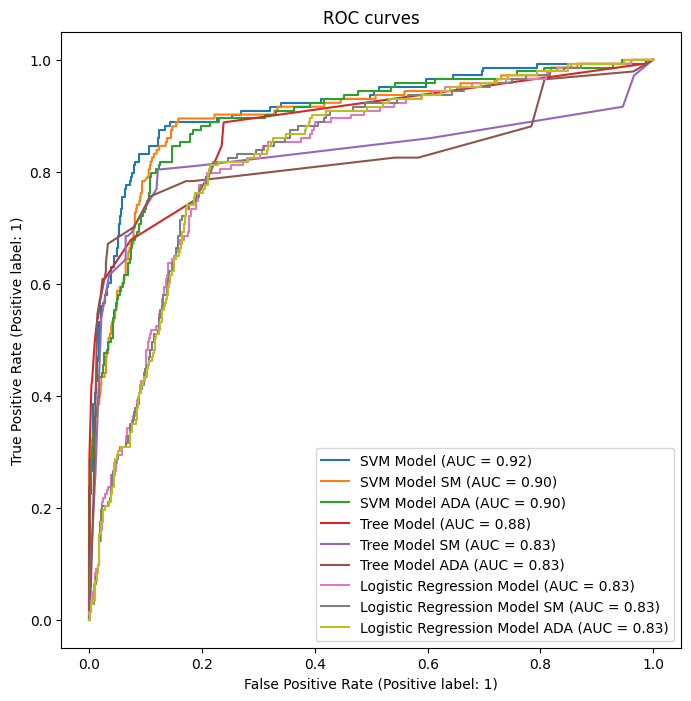

In [ ]:
models = [
    ("SVM Model", svm_model),
    ("SVM Model SM", svm_model_sm),
    ("SVM Model ADA", svm_model_ada),
    ("Tree Model", tree_model),
    ("Tree Model SM", tree_sm),
    ("Tree Model ADA", tree_ada),
    ("Logistic Regression Model", logreg_model),
    ("Logistic Regression Model SM", logreg_sm),
    ("Logistic Regression Model ADA", logreg_ada)]
# Plot ROC and AUC for each model
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_title("ROC curves")

for model_name, model in models:
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name=f"{model_name}")

plt.legend()
plt.show()

Recall is the our focus metric to compare the three models as it tells the models' accuracy to predict churn cases. Out of the all models, Logistic Regression built on balanced data using SMOTE method and ADASYN performs the best in predicting churners, both with the recall score of ~0.82. Between these two models, Logistic Regression with SMOTE outperformed the one using ADASYN in terms of accuracy so we decided to move forward with Logistic Regression training with balanced data using SMOTE.

#Hyperparameter optimization for Logistic Regression (SMOTE)

Implement the hyperparameter tuning for the chosen model, Logistic Regression (SMOTE) with 5-fold cross-validation, finding the hyperparameter combination that maximise the Recall score of the model.

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100, 1000, 2500, 5000]
    }]
logreg_sm_opt = GridSearchCV(LogisticRegression(), param_grid, scoring = 'recall', cv = 5, verbose = 0, refit = True, n_jobs=-1)
logreg_sm_opt.fit(X_train_sm, y_train_sm)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1350 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                          'max_iter': [50, 100, 1000, 2500, 5000],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag',
                                     'saga']}],
             scoring='recall')

In [ ]:
"Best Parameters:",logreg_sm_opt.best_params_


('Best Parameters:',
 {'C': 0.0001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'})

In [ ]:
y_pred_logreg_opt = logreg_sm_opt.predict(X_test)
recall_score(y_test, y_pred_logreg_opt)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8671328671328671

Text(0.5, 1.0, 'Logistic Regression (SMOTE) with optimized hyperparameters (normalized)')

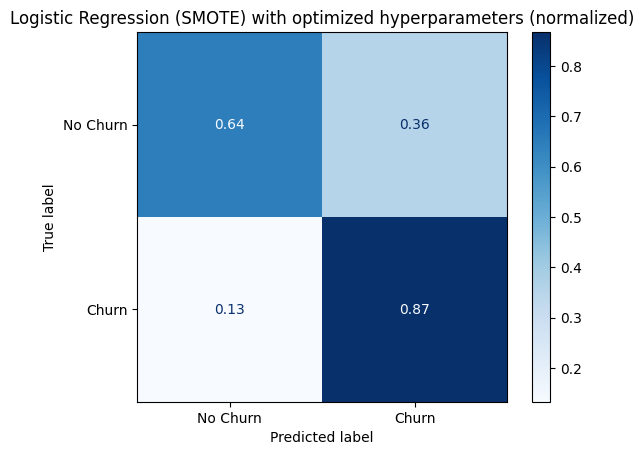

In [ ]:
#plot the confusion matrix for the model with optimized hyperparameters
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg_opt, display_labels = ['No Churn', 'Churn'], normalize='true', cmap = 'Blues')
plt.title("Logistic Regression (SMOTE) with optimized hyperparameters (normalized)")



Text(0.5, 1.0, 'Logistic Regression (SMOTE) with default hyperparameters (normalized)')

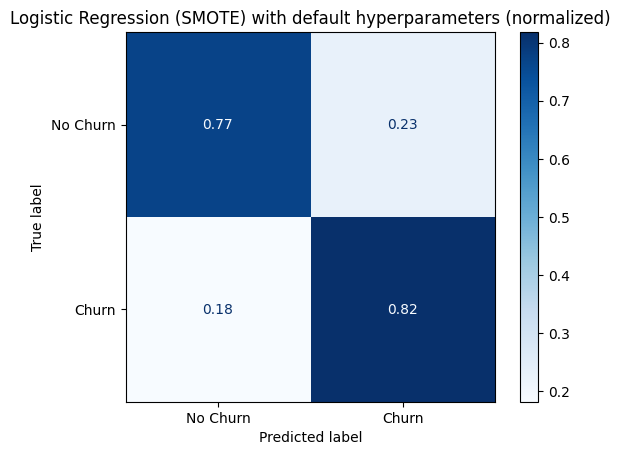

In [ ]:
#plot the confusion matrix for the model with default hyperparameters
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg_sm, display_labels = ['No Churn', 'Churn'], cmap = 'Blues', normalize='true')
plt.title("Logistic Regression (SMOTE) with default hyperparameters (normalized)")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


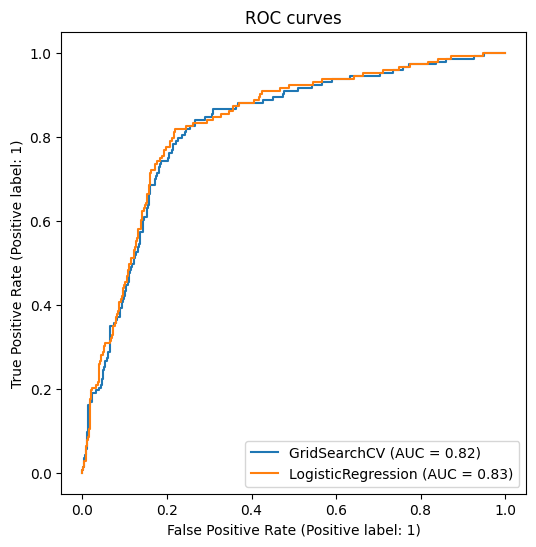

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.set_title("ROC curves")
RocCurveDisplay.from_estimator(logreg_sm_opt, X_test, y_test,ax=ax)
RocCurveDisplay.from_estimator(logreg_sm, X_test, y_test,ax=ax)

The Logistic Regression model after tuning even have slighly lower AUC score yet perform better at predicting churners. Our goal is to increase the model's accuracy in finding True Positives even if the model is a bit less accurate in predicting the people who do not churn. Therefore, the Logistic Regression (SMOTE) had the expected improved performance after the hyperparameter tuning.